<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/Copy_of_leaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
path = Path("/content/sample_data")
print(path)
for file, folder in [('lipomoeapescaprae.csv', 'ipomoea'), ('lxylocarpusgranatum.csv', 'xylocarpus '), ('lheritieralittoralis.csv', 'heritiera'),
                     ('lAcanthusilicifolius.csv', 'Acanthus'),('lrhizophoramucronata.csv', 'Rhizophora')]:
    dest = path/folder # path + '/' + folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest)

/content/sample_data


In [ ]:
bs = 64  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = '/content/sample_data'

In [ ]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes)            

There are  5 classes:
 ['xylocarpus ', 'Acanthus', 'Rhizophora', 'heritiera', 'ipomoea']


In [ ]:
classes=classes[1:]

In [ ]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

Class: heritiera


Class: ipomoea


In [ ]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)

In [ ]:
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 1280 training images and 320 validation images.


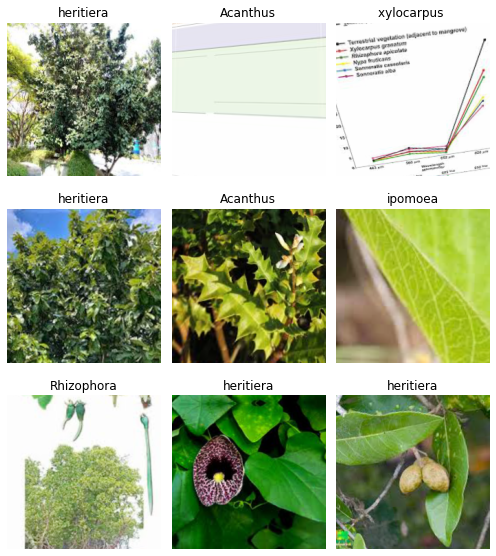

In [ ]:
data.show_batch(rows=3, figsize=(7, 8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Acanthus', 'Rhizophora', 'heritiera', 'ipomoea', 'xylocarpus '],
 5,
 1280,
 320)

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


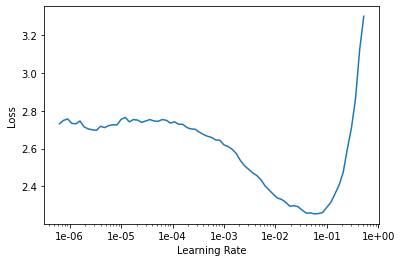

In [ ]:
learn.lr_find();
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.272376,1.765694,0.431250,0.568750,00:18
1,1.766373,1.440717,0.418750,0.581250,00:17
2,1.448941,1.219830,0.428125,0.571875,00:18
3,1.214672,1.149114,0.403125,0.596875,00:18


In [23]:
interp = ClassificationInterpretation.from_learner(learn)

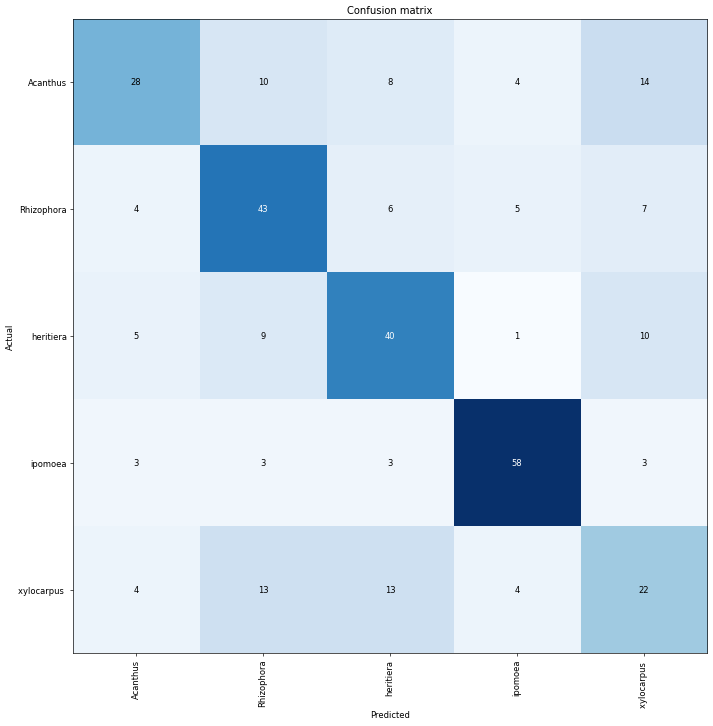

In [24]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

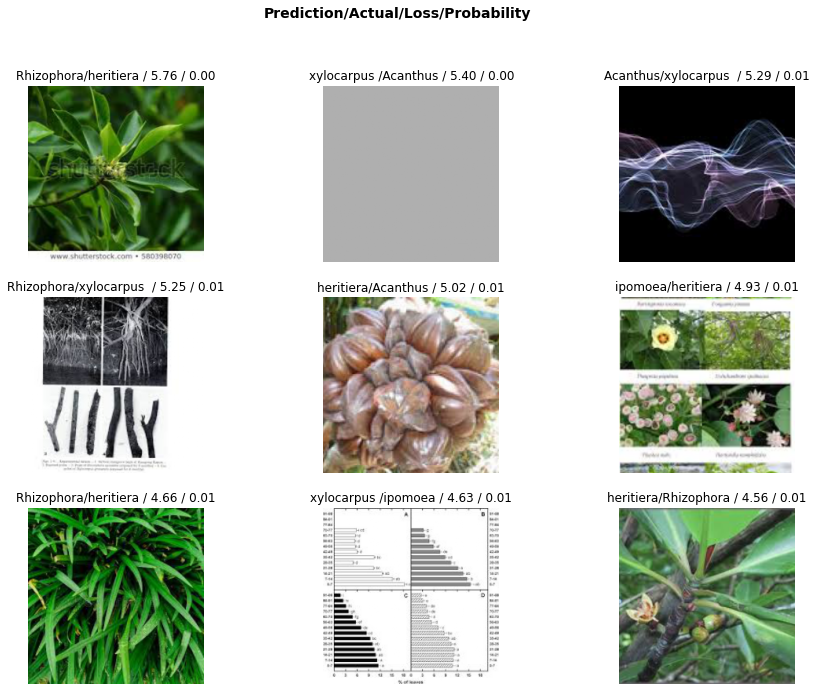

In [26]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

In [27]:
from fastai.widgets import *

In [28]:
learn.export()

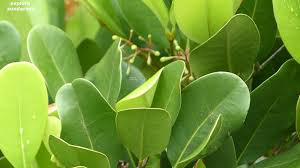

In [29]:
img = open_image('/content/sample_data/xylo.jpg')
img

In [30]:
learn = load_learner(PATH)

In [31]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category tensor(1)

In [32]:
pred_idx

tensor(1)

In [33]:
np.argmax(outputs)

tensor(1)

In [34]:
classes[pred_idx]

'ipomoea'